<h1><center>Machine Learning Applications</center></h1>
<h2><center>Week 2</center></h2>



In [ ]:
# Imports
from google.colab import drive
from pathlib import Path

import pandas as pd
import numpy as np
import os

# Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
# Setting up the notebook.

# 1. Mounting the drive
# drive.mount('/content/gdrive', force_remount=True)

# 2. Path on the drive to work in
# week_number = 2
# base_path = Path("/content/gdrive/MyDrive/mla/tech3300")
# path = base_path.joinpath(f"week{week_number}")

week_number = 2
base_path = os.path.abspath("/Secondary_Drive/Kaplan_Study_M/Tech3300/tech3300/")
week_path = os.path.join(base_path, f"week{week_number}")
os.chdir(week_path)


Mounted at /content/gdrive


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves the initial investigation of data to discover patterns, relationships, anomalies, and insights. It serves several important purposes in data analysis:

- Understanding the Data
- Data Cleaning
- Identifying Patterns and Trends
- Visualizing Data
- Hypothesis Generation
- Feature Selection
- Data Transformation

**P.S.** If using colab, google might automatically converts your .csv to .gsheet. If so, follow [this](https://support.google.com/docs/thread/224411699/google-drive-automatically-changed-my-csv-files-to-gsheet-files-and-i-need-to-change-them-back?hl=en).

In [ ]:
# Load the data
df = pd.read_csv(path.joinpath("football.csv"))

## Understanding the data


In [ ]:
# Looking at the data - first 5 values.
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
# Looking at the data - last 5 values.
df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [ ]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Data Cleaning

In [ ]:
# Data Cleaning
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Reformating Wage Columns
def clean(df):
    df['Wage'] = df['Wage'].str.replace("€","").str.replace("K","").astype("float")
    df['Wage'] = df["Wage"] * 1000

    return df

df = clean(df)

## Visualising/Analysing patterns and trends with specific objectives.


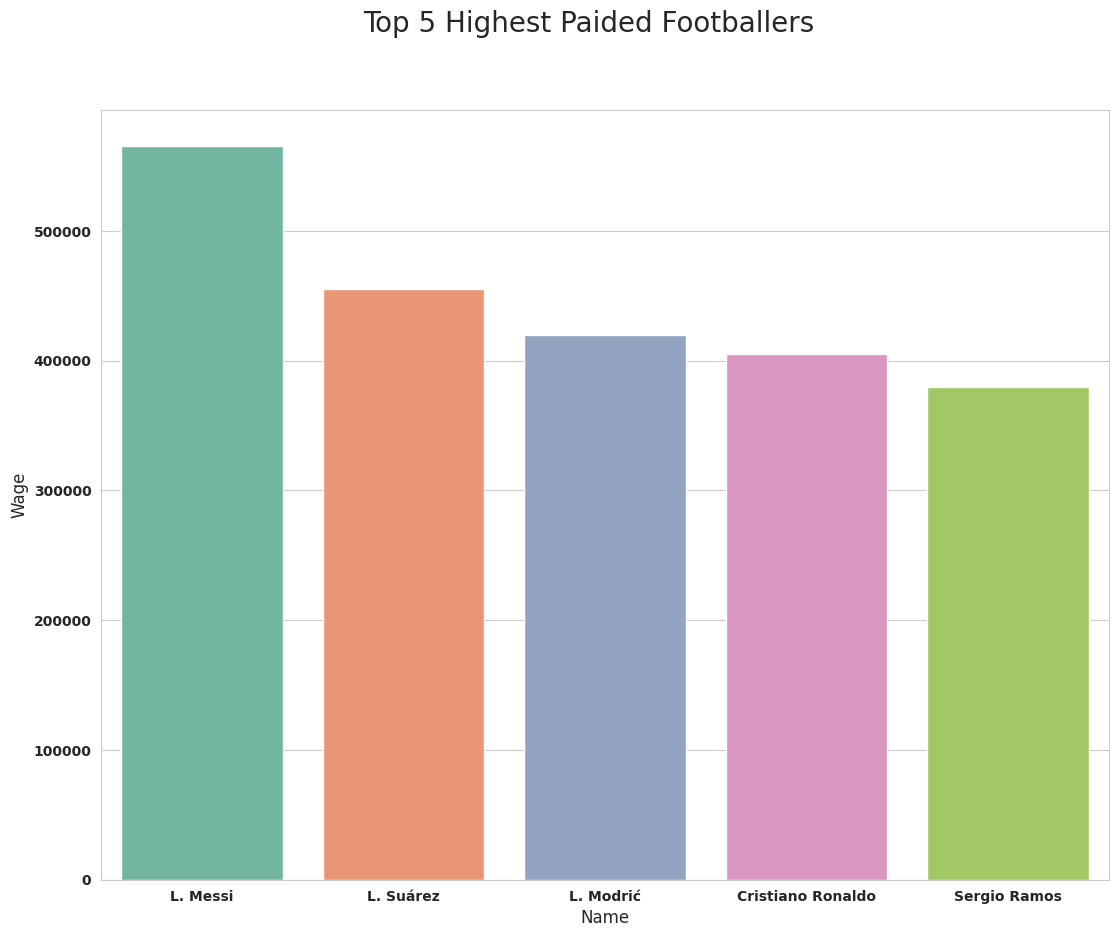

In [ ]:
# Plot 1 - Highest Wage Paided To A Footballer?
fig = plt.figure(figsize=(13,10))
wages = df.sort_values(by="Wage", ascending=False)

sns.barplot(data=wages.head(5), x="Name", y='Wage')

# Label
fig.suptitle("Top 5 Highest Paided Footballers", fontsize=20)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Wage', fontsize=12)

plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')

plt.show()

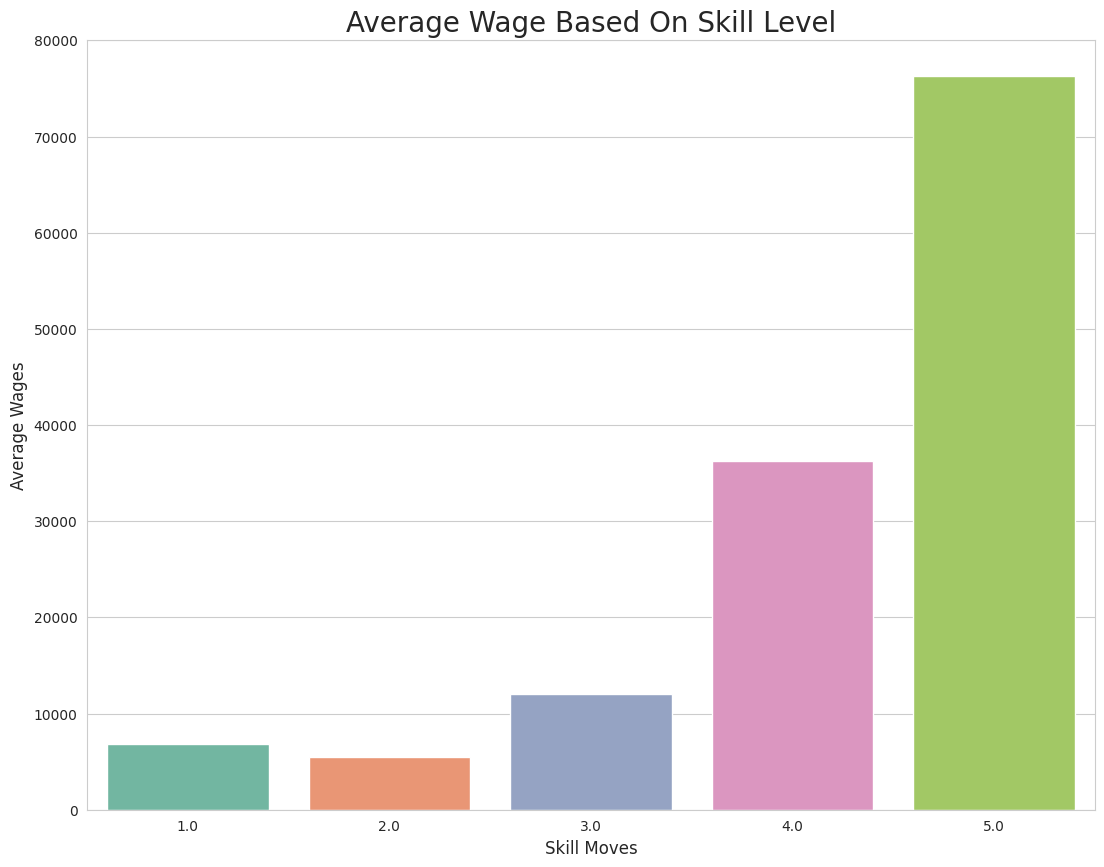

In [ ]:
# Plot 2 - Footballers Wage Based On Skill Moves
sns.set_palette('Set2')
sns.set_style('whitegrid')

fig = plt.figure(figsize=(13,10))

avg_wages = df.groupby('Skill Moves')['Wage'].mean().reset_index(name='Average Wage')

sns.barplot(data=avg_wages.head(5), x="Skill Moves", y='Average Wage')

# Label

plt.title("Average Wage Based On Skill Level", fontsize=20)
plt.xlabel("Skill Moves", fontsize=12)
plt.ylabel("Average Wages", fontsize=12)


plt.show()

<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> Average Wage Has Positive Trend With Increasing Skill Level</p>

</div>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3201: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.



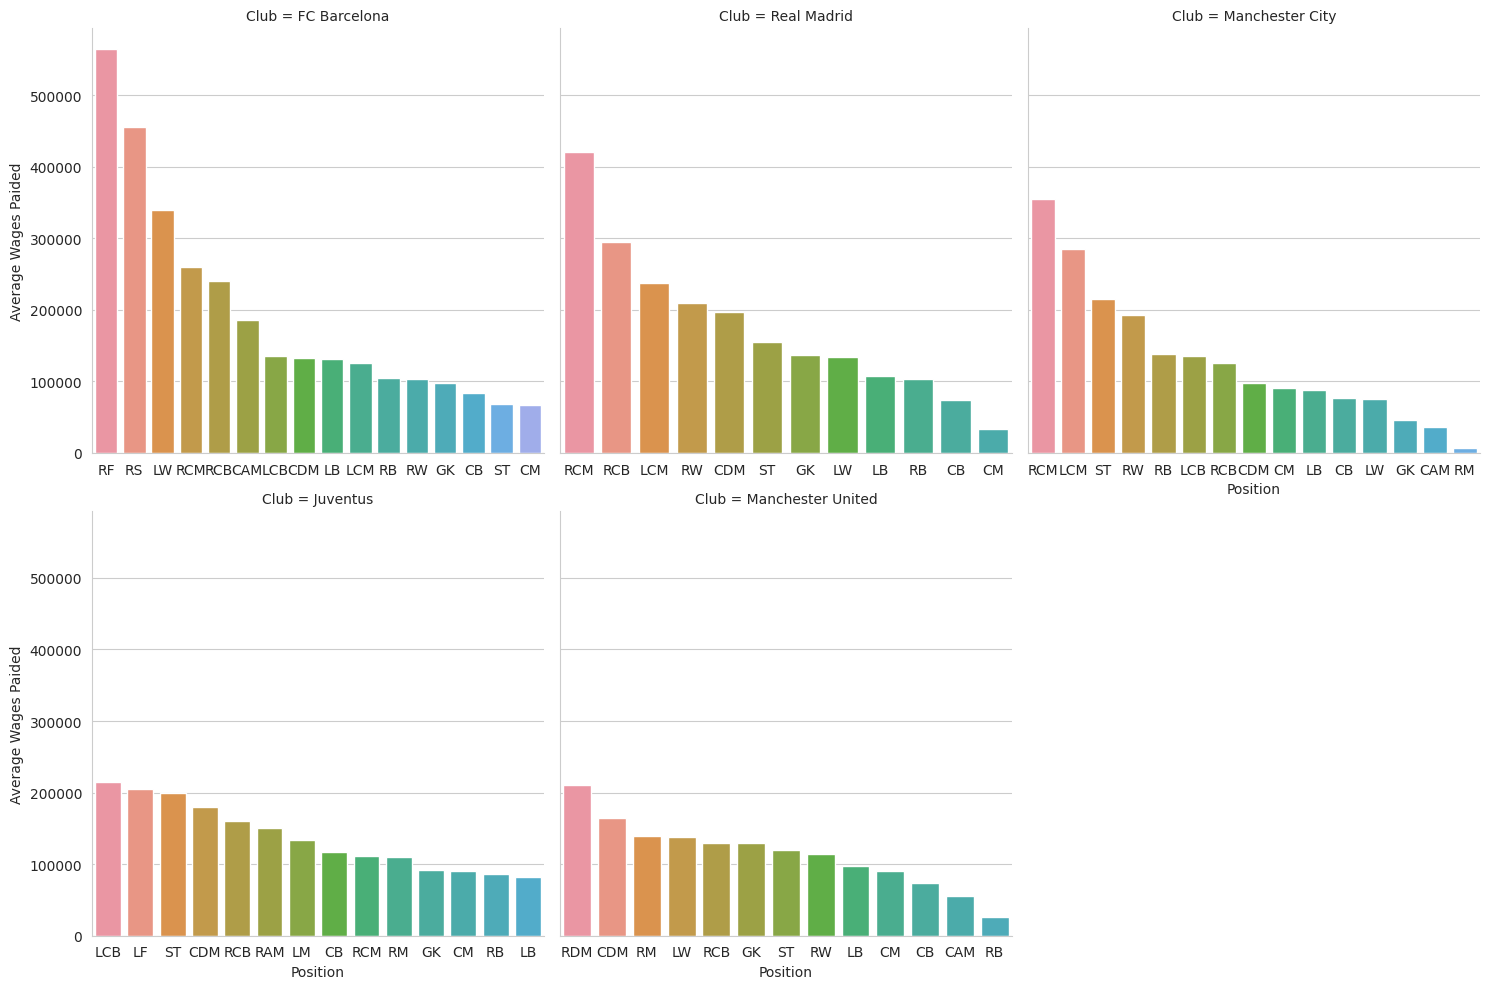

In [ ]:
# Plot 3 - Which Position is More Important In These Clubs
richest_club_df = df.groupby(["Club"])['Wage'].sum().reset_index(name='Total Wages Paided')

richest_club_df['Total Wages Paided [Millions]'] = round(richest_club_df['Total Wages Paided'] / 1000000, 4)

richest_club_df.head()

richest_club = richest_club_df.sort_values(by='Total Wages Paided',ascending=False).head(5)
# Get Top 5 Richest Club List
richest_club = richest_club['Club'].values

# Filter all the data based on Richest List
richest_list_df = df[df['Club'].isin(richest_club)]

richest_club_df = richest_list_df.groupby(["Club", "Position"])['Wage'].mean().reset_index(name='Average Wages Paided')

richest_club_df.head()

sns.catplot(data=richest_club_df.sort_values(by='Average Wages Paided',ascending=False), x='Position', y='Average Wages Paided',col='Club', col_wrap=3, kind='bar', sharex=False)




<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> Each Clubs has there own bias towards players. It's very clear that Three out of 5 clubs had a Midfielder as there top Wager</p>

</div>

In [ ]:
# Plot 4 - Nationality Based Wage

# Import Iso Dataset
country_df = pd.read_csv(path.joinpath('country.csv'))

# Merge Iso Code to new_df
new_df = df.merge(country_df, how='left', left_on='Nationality',right_on='English short name lower case')

# Prep Data For Visual
country_wage = df.groupby('Nationality')['Wage'].sum().reset_index(name= 'Total Wage')

country_wage = pd.merge(country_wage, country_df, how='left', left_on='Nationality', right_on='English short name lower case')

# Creating a Density scale for better mapping of Wage's
np.seterr(divide = 'ignore')
country_wage['Total Wage Log'] = np.where(country_wage['Total Wage']>0, np.log(country_wage['Total Wage']), 0)

fig = px.choropleth(country_wage, locations="Alpha-3 code",
                    color="Total Wage Log",
                    hover_name="Nationality", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                   hover_data=["Total Wage"])
fig.show()

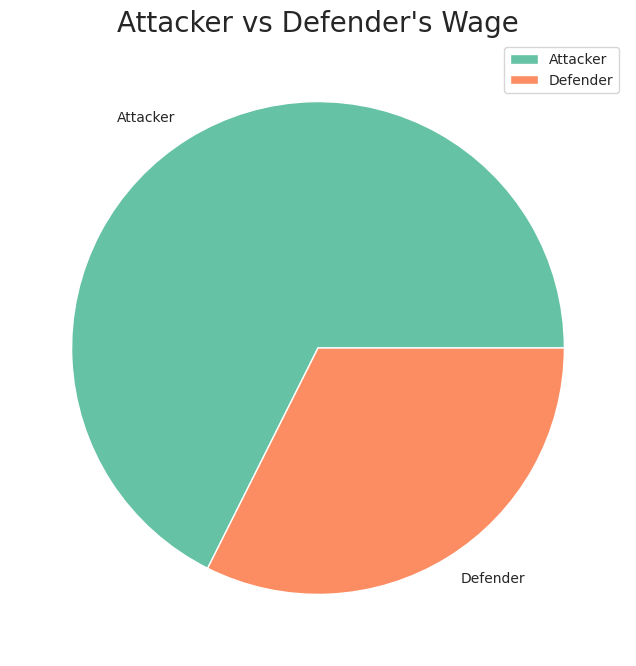

In [ ]:
# Plot 5 - Attacker vs Defenders wage

# Prep Data
Defenders_position = ['LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
Attackers_position = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM']

defenders_df = df[df['Position'].isin(Defenders_position)]
attackers_df = df[df['Position'].isin(Attackers_position)]

# Create Average Wage
avg_d = defenders_df.groupby('Position')['Wage'].mean().mean()
avg_a = attackers_df.groupby('Position')['Wage'].mean().mean()

# Create DataFrame For Visual
a_d = pd.DataFrame({
    'Position':['Attacker', 'Defender'],
    'Average Wage': [avg_a, avg_d]
})

fig = plt.figure(figsize=(10,8))

plt.pie(data=a_d, x='Average Wage', labels='Position')

plt.legend(a_d['Position'], loc='upper right')

plt.title("Attacker vs Defender's Wage", fontsize=20)

plt.show()

<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> Showcases that Attackers on average are paided way more</p>

</div>

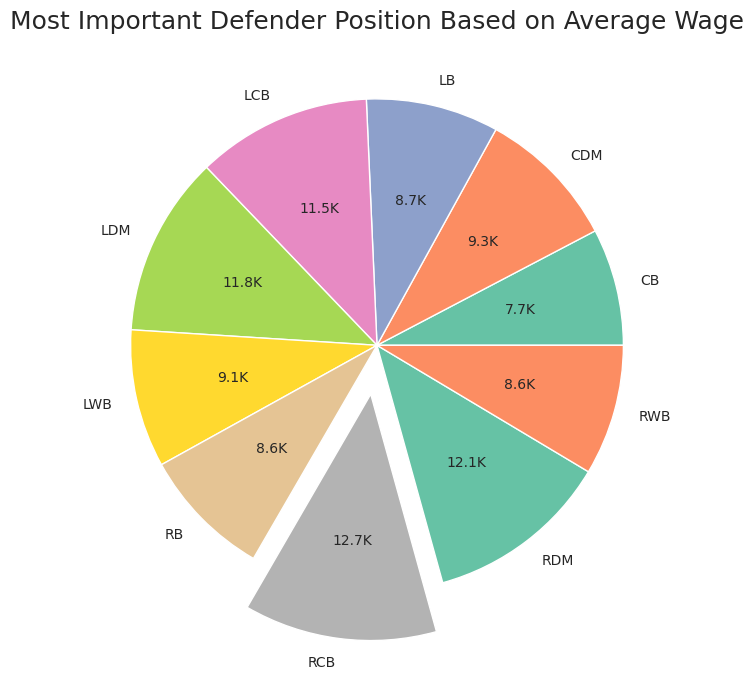

In [ ]:
# Plot 6 - Which defender position is paid more?

data = defenders_df[['Position','Wage']]

# Create a Group by on Position and Calculate on Wage //  Rename New Column
data = data.groupby('Position')['Wage'].mean().reset_index(name='Average Wage')

fig = plt.figure(figsize=(10,8))

# Create a Inner Label for pie
def func(pct):
  return (f"{round(pct,1)}K")

plt.pie(data=data, x='Average Wage', labels='Position', autopct=lambda pct: func(pct), explode=[0,0,0,0,0,0,0,0.2,0,0])

plt.title("Most Important Defender Position Based on Average Wage", fontsize=18)

plt.show()

<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> Right Center Back seems to be the most paided amongst the other defenders, whereas Right Defensive Midfielder(RDM) is up there with RCB.</p>

</div>

# Exercise

<p style="text-align:center; font-size:1.35rem"> <font color='red'>Take 15 mins to write code and analyse the following:</font></p>

In [ ]:
# Q1. Asian National Footballers Wage.




In [ ]:
# Q2. Asian National Footballers Wage.




In [ ]:
# Q3. Which Attacker Position is Paid more?




## Answers

In [ ]:
# Ans 1. Asian National Footballers Wage.

fig = px.choropleth(country_wage, locations="Alpha-3 code",
                    color="Total Wage Log",
                    hover_name="Nationality", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Inferno,
                   hover_data=["Total Wage"],
                   scope='europe')
fig.show()

<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> As we can see, mostly footballers with higher wage are either Spanish, French and Germany. Whereas, the lowest wage footballers are from Greece, Belarus etc.</p>

</div>

In [ ]:
 # Ans2. Asian National Footballers Wage.

fig = px.choropleth(country_wage, locations="Alpha-3 code",
                    color="Total Wage Log",
                    hover_name="Nationality", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Inferno,
                   hover_data=["Total Wage"],
                   scope='asia')
fig.show()

<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> Suprisingly, Turkish, Saudia Arabians and Japanese footballers earn alot more compared to other asian nationals. However we havn't considered which club or league they play in yet</p>

</div>

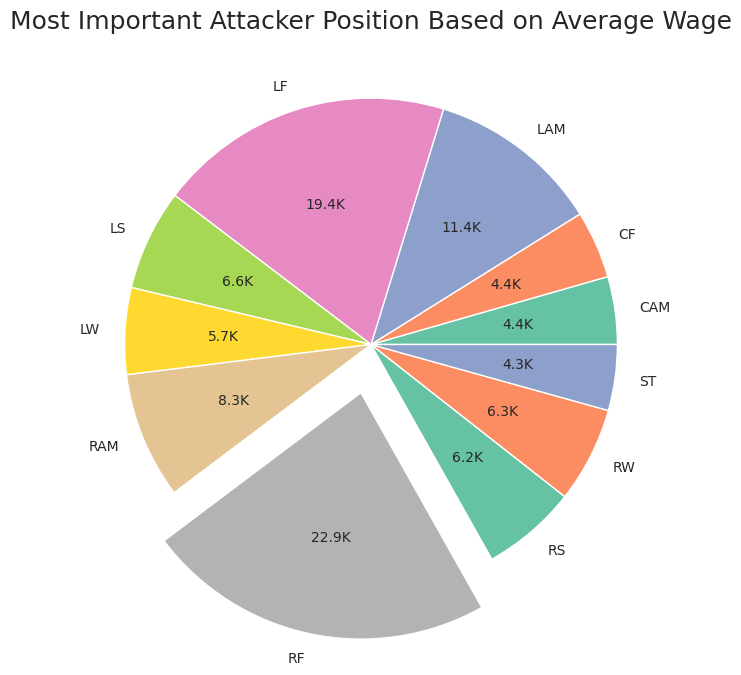

In [ ]:
# Ans 3. Which Attacker position is paid more?

attackers_df.head()

data = attackers_df[['Position','Wage']]

# Create a Group by on Position and Calculate on Wage //  Rename New Column
data = data.groupby('Position')['Wage'].mean().reset_index(name='Average Wage')

fig = plt.figure(figsize=(10,8))

# Create a Inner Label for pie
def func(pct):
  return (f"{round(pct,1)}K")

plt.pie(data=data, x='Average Wage', labels='Position', autopct=lambda pct: func(pct), explode=[0,0,0,0,0,0,0,0.2,0,0,0])

plt.title("Most Important Attacker Position Based on Average Wage", fontsize=18)

plt.show()

<div class="alert alert-block alert-success center">  
<p style="text-align:center; font-size:1.35rem"><b>Analysis:</b> There was a clearly disparity of wages paided for Attacking Players, LF and RF were the most paided, this could point towards players wage being skewed towards how "High up" the field they play in however, other attackers wage distribution seems to narrate something else. Like ST and CF.</p>

</div>

THE END